In [75]:
import pandas as pd

full_df = pd.read_csv('data/full_df-0.csv')
full_df.head()



,x-axis,y-axis,precipitation,air_temp,ocean_temp,ocean_salinity,ice_thickness,ice_velocity,ice_mask
0,-1337600,3040000,437.321442,266.841583,272.705383,12.659061,0.0,-1.0,4.0
1,-1216000,3040000,408.996857,266.624084,272.611725,12.383535,0.0,-1.0,4.0
2,-1094400,3040000,394.199585,266.458008,272.541992,12.030684,0.0,-1.0,4.0
3,-972800,3040000,383.704193,266.339508,272.491638,11.602744,0.0,-1.0,4.0
4,-851200,3040000,380.570068,266.326416,272.446899,11.102610,0.0,-1.0,4.0


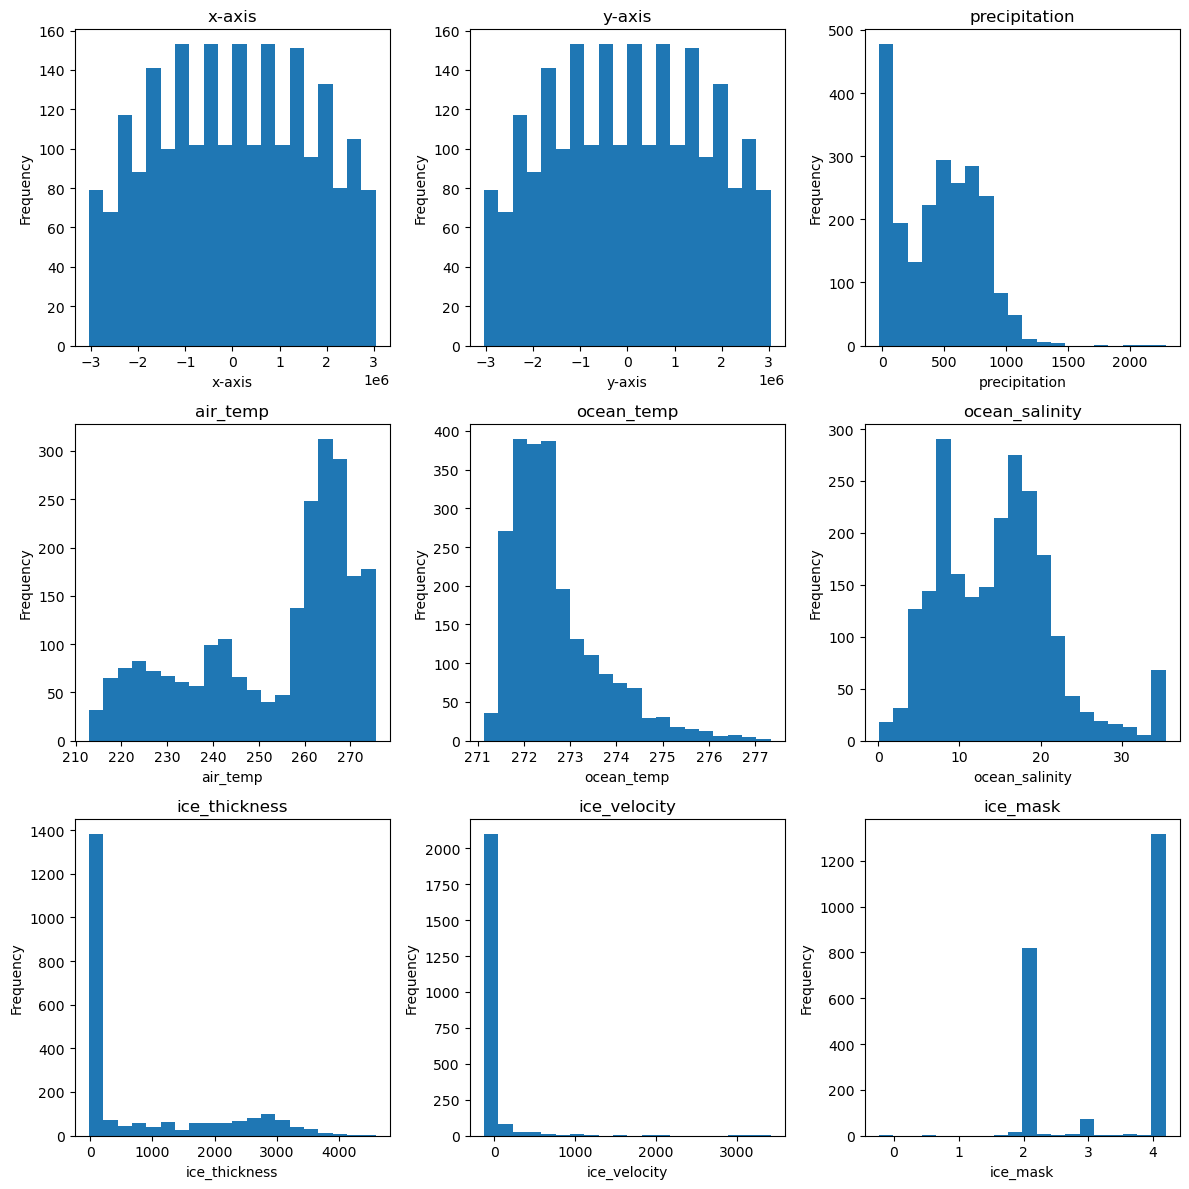

In [76]:
import matplotlib.pyplot as plt

def plot_attribute_distributions(df):
    attributes = df.columns  # List of all column names in the DataFrame
    n_attributes = len(attributes)
    
    # Calculate the number of rows needed for two columns
    nrows = (n_attributes + 1) // 3
    
    # Set up the matplotlib figure with two columns
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(12, nrows * 4))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i, attribute in enumerate(attributes):
        # Plotting the histogram for each attribute
        df[attribute].plot(kind='hist', bins=20, ax=axes[i])
        axes[i].set_title(f'{attribute}')
        axes[i].set_xlabel(attribute)
        axes[i].set_ylabel('Frequency')

    # Hide any unused subplots
    for j in range(i + 1, nrows * 2):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_attribute_distributions(full_df)



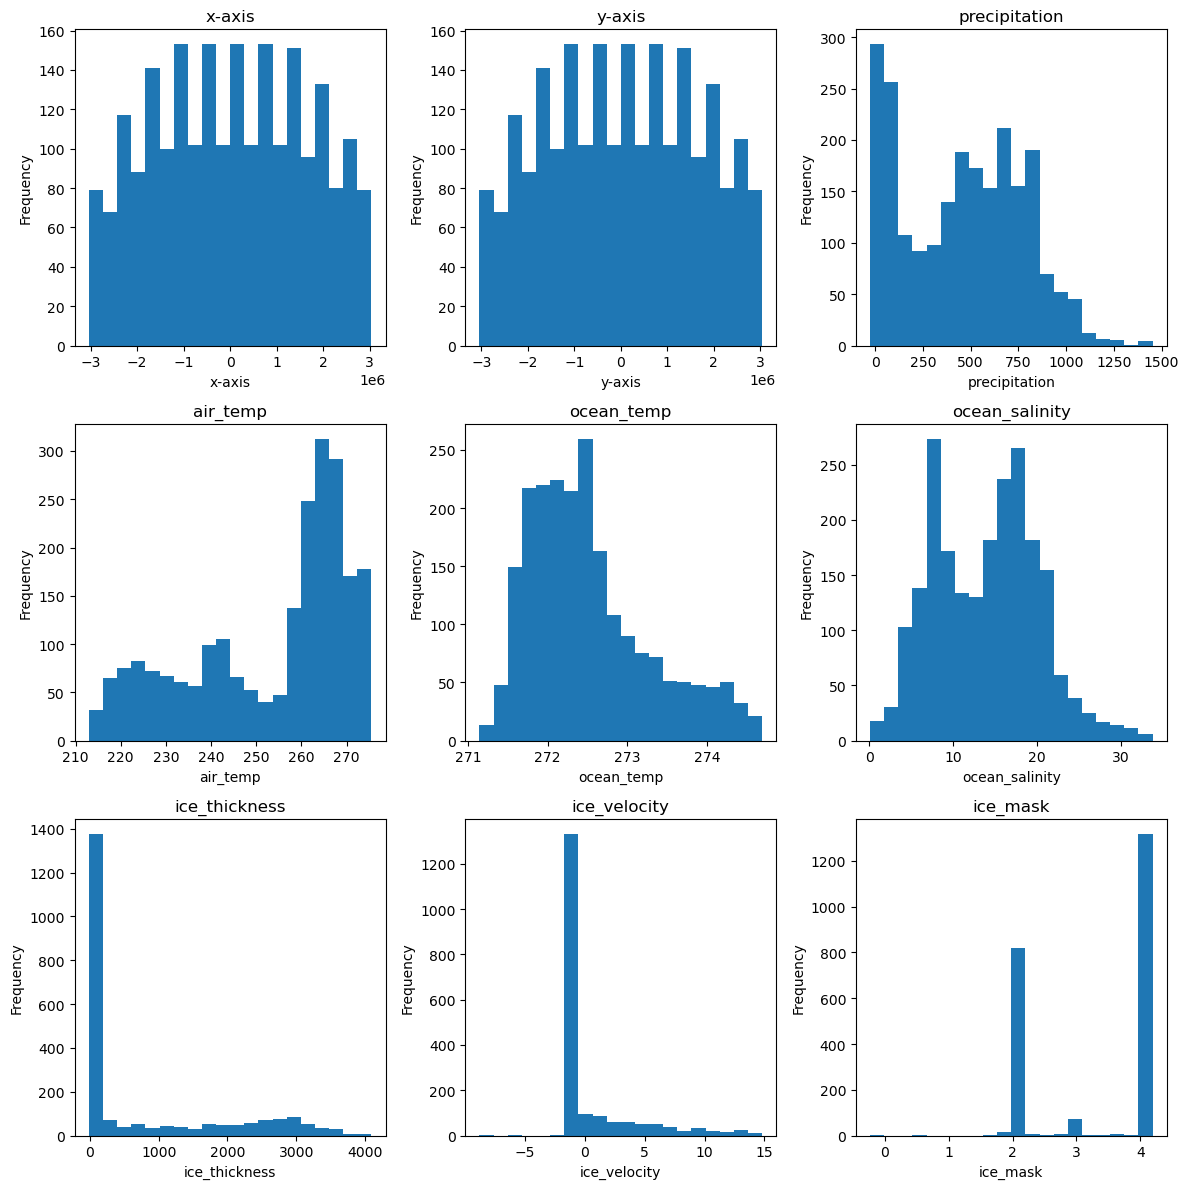

In [49]:

def plot_attribute_distributions_with_outliers_removed(df):
    attributes = df.columns  # List of all column names in the DataFrame
    n_attributes = len(attributes)
    
    # Calculate the number of rows needed for two columns
    nrows = (n_attributes + 1) // 3
    
    # Set up the matplotlib figure with two columns
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(12, nrows * 4))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i, attribute in enumerate(attributes):
        # Removing outliers using IQR
        Q1 = df[attribute].quantile(0.25)
        Q3 = df[attribute].quantile(0.75)
        IQR = Q3 - Q1
        
        #I used a factor of 1.5 - just because it seems a common choice 
        filtered_df = df[(df[attribute] >= (Q1 - 1.5 * IQR)) & (df[attribute] <= (Q3 + 1.5 * IQR))]

        # Plotting the histogram for each attribute
        filtered_df[attribute].plot(kind='hist', bins=20, ax=axes[i])
        axes[i].set_title(f'{attribute}')
        axes[i].set_xlabel(attribute)
        axes[i].set_ylabel('Frequency')

    # Hide any unused subplots
    for j in range(i + 1, nrows * 2):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_attribute_distributions_with_outliers_removed(full_df)


In [50]:
full_df.describe()

,x-axis,y-axis,precipitation,air_temp,ocean_temp,ocean_salinity,ice_thickness,ice_velocity,ice_mask
count,2.257000e+03,2.257000e+03,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000
mean,0.000000e+00,0.000000e+00,459.218673,253.250122,272.661120,14.612805,786.863560,32.871003,3.211739
std,1.632339e+06,1.632339e+06,321.010247,17.451287,0.989742,7.036216,1165.988340,179.369400,0.959850
min,-3.040000e+06,-3.040000e+06,-26.648338,212.949539,271.142242,0.112596,-16.252274,-123.940895,-0.229760
25%,-1.337600e+06,-1.337600e+06,128.605972,239.715210,271.964874,8.552329,0.000000,-1.000000,2.000000
50%,0.000000e+00,0.000000e+00,477.346161,260.951752,272.414734,14.867147,0.000000,-1.000000,4.000000
75%,1.337600e+06,1.337600e+06,704.524414,266.593628,273.058380,18.721558,1657.558350,5.325965,4.000000
max,3.040000e+06,3.040000e+06,2290.933838,275.501678,277.330841,35.370872,4588.459961,3421.989746,4.192000


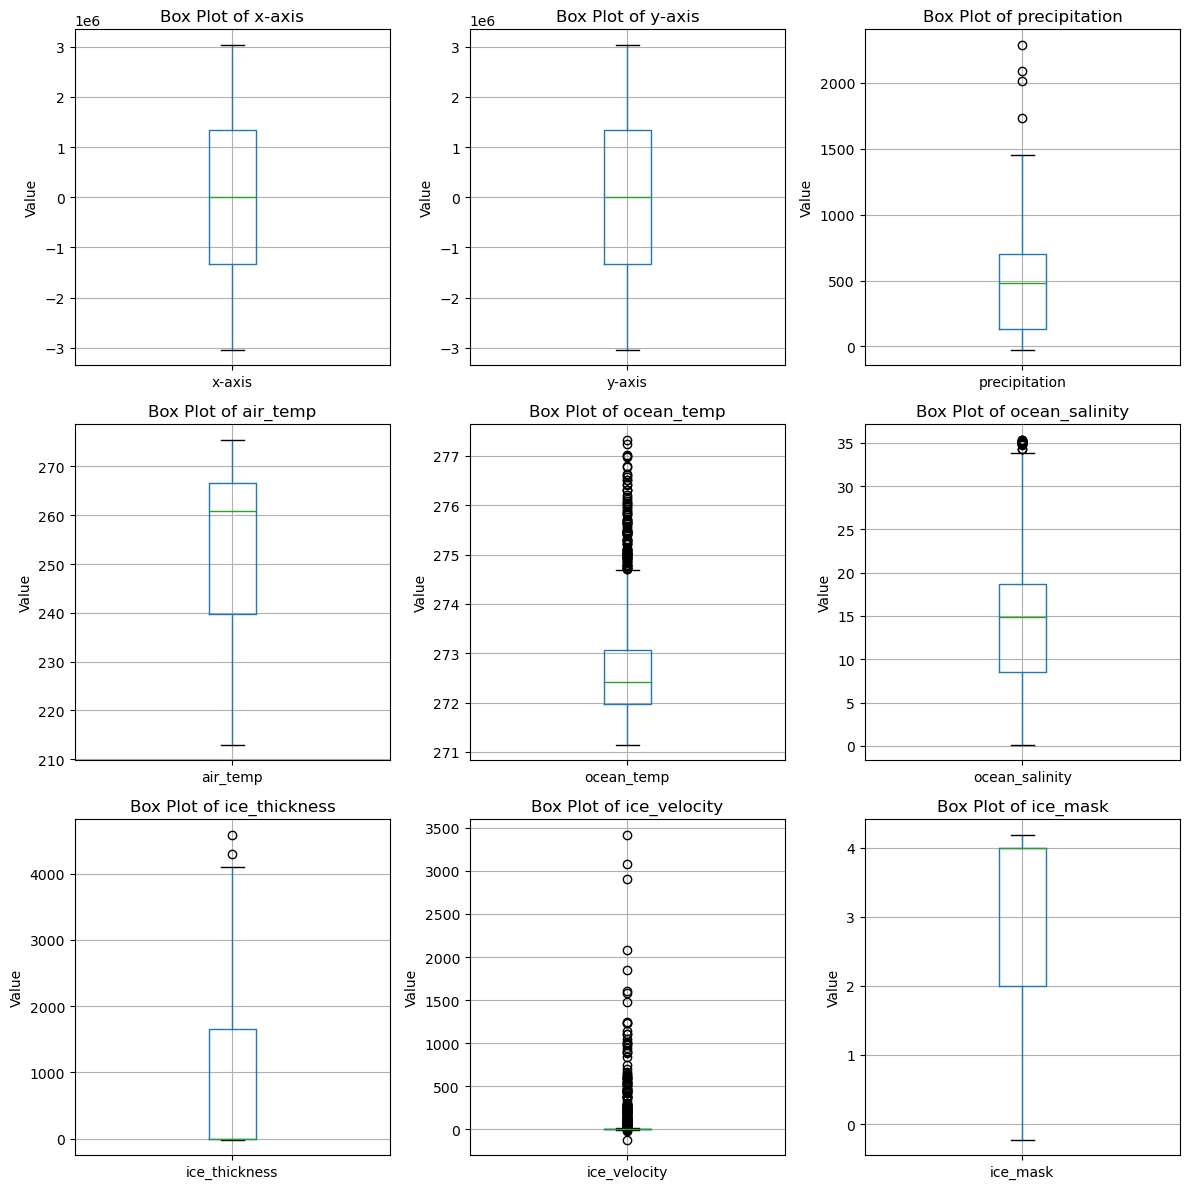

In [56]:
import matplotlib.pyplot as plt

def plot_boxplots(df):
    # Exclude the last feature 'ice mask'
    features = df.columns
    n_features = len(features)
    
    # Calculate the number of rows needed for two columns
    nrows = (n_features + 1) // 3
    
    # Set up the matplotlib figure with two columns
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(12, nrows * 4))
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i, feature in enumerate(features):
        # Plotting the box plot for each feature
        df.boxplot(column=feature, ax=axes[i])
        axes[i].set_title(f'Box Plot of {feature}')
        axes[i].set_ylabel('Value')

    # Hide any unused subplots
    for j in range(i + 1, nrows * 2):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_boxplots(full_df)


In [60]:
from scipy import stats

def calculate_trimmed_means(df, proportion_to_trim=0.2):

    trimmed_means = {}
    for attribute in df.columns:
        trimmed_mean = stats.trim_mean(df[attribute], proportion_to_trim)
        trimmed_means[attribute] = trimmed_mean

    return trimmed_means

trimmed_means = calculate_trimmed_means(full_df)
print(trimmed_means)


{'x-axis': 0.0, 'y-axis': 0.0, 'precipitation': 451.99643968533417, 'air_temp': 256.7580006954856, 'ocean_temp': 272.4490078071063, 'ocean_salinity': 14.17602688905458, 'ice_thickness': 358.7937891272217, 'ice_velocity': 0.44949829194427154, 'ice_mask': 3.356051553571343}


In [70]:
import numpy as np

def calculate_metrics_separate_dataframes(df, proportion_to_trim=0.1):

    # Initialize lists to store data for untrimmed and trimmed metrics
    attributes, untrimmed_ranges, untrimmed_variances, untrimmed_std_devs = [], [], [], []
    trimmed_ranges, trimmed_variances, trimmed_std_devs = [], [], []

    for attribute in df.columns:
        data = df[attribute]
        trimmed_data = stats.trimboth(data, proportion_to_trim)

        # Untrimmed metrics
        attributes.append(attribute)
        untrimmed_ranges.append(np.ptp(data))
        untrimmed_variances.append(np.var(data, ddof=1)) 
        untrimmed_std_devs.append(np.std(data, ddof=1)) 

        # Trimmed metrics
        trimmed_ranges.append(np.ptp(trimmed_data))
        trimmed_variances.append(np.var(trimmed_data, ddof=1))
        trimmed_std_devs.append(np.std(trimmed_data, ddof=1))

    # Creating the DataFrames
    untrimmed_metrics_df = pd.DataFrame({
        'Attribute': attributes,
        'Range': untrimmed_ranges,
        'Variance': untrimmed_variances,
        'Standard Deviation': untrimmed_std_devs
    })

    trimmed_metrics_df = pd.DataFrame({
        'Attribute': attributes,
        'Range': trimmed_ranges,
        'Variance': trimmed_variances,
        'Standard Deviation': trimmed_std_devs
    })

    return untrimmed_metrics_df, trimmed_metrics_df

# Example usage
untrimmed_metrics_df, trimmed_metrics_df = calculate_metrics_separate_dataframes(full_df)
print(untrimmed_metrics_df)


        Attribute         Range      Variance  Standard Deviation
0          x-axis  6.080000e+06  2.663350e+12        1.631977e+06
1          y-axis  6.080000e+06  2.663350e+12        1.631977e+06
2   precipitation  2.317582e+03  1.030019e+05        3.209391e+02
3        air_temp  6.255214e+01  3.044125e+02        1.744742e+01
4      ocean_temp  6.188599e+00  9.791557e-01        9.895229e-01
5  ocean_salinity  3.525828e+01  4.948640e+01        7.034657e+00
6   ice_thickness  4.604712e+03  1.358926e+06        1.165730e+03
7    ice_velocity  3.545931e+03  3.215913e+04        1.793297e+02
8        ice_mask  4.421760e+00  9.209044e-01        9.596377e-01


In [71]:
print(trimmed_metrics_df)


        Attribute         Range      Variance  Standard Deviation
0          x-axis  4.377600e+06  1.588520e+12        1.260365e+06
1          y-axis  4.377600e+06  1.588520e+12        1.260365e+06
2   precipitation  8.143723e+02  6.425974e+04        2.534950e+02
3        air_temp  4.709206e+01  1.853194e+02        1.361321e+01
4      ocean_temp  2.428772e+00  3.525475e-01        5.937571e-01
5  ocean_salinity  1.616575e+01  2.125779e+01        4.610617e+00
6   ice_thickness  2.838102e+03  8.385499e+05        9.157237e+02
7    ice_velocity  3.030886e+01  3.809751e+01        6.172318e+00
8        ice_mask  2.000000e+00  8.756201e-01        9.357458e-01
